In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import cross_validation
#from sklearn.linear_model import LinearRegression

from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

/Users/lili/miniconda3/envs/analysis3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# modify time to 
def my_reducer(a):
    return pd.to_datetime(a[0])

reducer = np.vectorize(my_reducer)

In [3]:
spy0 = pd.read_csv('/Users/lili/Research/Study_materials/Finance/spy/spy.csv', 
                      header=0, sep=' ')
spy_design0 = pd.read_csv('/Users/lili/Research/Study_materials/Finance/spy/spy_design.csv', 
                         header=0, sep=' ',  parse_dates=True)

spy_indices = spy0.index.values
spy_design_indices = spy_design0.index.values

spy_indexes = reducer(spy_indices)
spy0['TIME'] = spy_indexes

spy_design_indexes = reducer(spy_design_indices)
spy_design0['TIME'] = spy_design_indexes

spy0 = spy0.set_index('TIME')
spy_design0 = spy_design0.set_index('TIME')

In [4]:
# how to calculate those values?
spy_design0.head()

,Index,returns,returns.WA5,variance,skew,hurst,rets_var,rets_skew
TIME,,,,,,,,
2008-01-02 09:31:00,09:31:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-02 09:32:00,09:32:00,0.707107,0.707107,0.707107,-0.707107,0.000000,0.707107,-0.707107
2008-01-02 09:33:00,09:33:00,1.034910,1.031794,1.027297,-0.901304,0.000000,1.133169,-1.111012
2008-01-02 09:34:00,09:34:00,-1.177622,-0.712844,1.407897,1.277819,0.000000,-1.366479,-0.030410
2008-01-02 09:35:00,09:35:00,0.451147,-0.181499,0.593341,-1.669053,-1.788854,0.854902,-1.641664


In [5]:
spy0.head()

,Index,SPY.Open,SPY.High,SPY.Low,SPY.Close,SPY.Volume
TIME,,,,,,
2008-01-02 09:31:00,09:31:00,146.535,146.645,146.535,146.645,591203.0
2008-01-02 09:32:00,09:32:00,146.645,146.685,146.635,146.685,385457.0
2008-01-02 09:33:00,09:33:00,146.685,146.775,146.680,146.775,343700.0
2008-01-02 09:34:00,09:34:00,146.725,146.755,146.705,146.725,863418.0
2008-01-02 09:35:00,09:35:00,146.705,146.775,146.685,146.775,457500.0


In [6]:
# remove column called index
spy = spy0.ix[:, 1:6]
spy.head()

,SPY.Open,SPY.High,SPY.Low,SPY.Close,SPY.Volume
TIME,,,,,
2008-01-02 09:31:00,146.535,146.645,146.535,146.645,591203.0
2008-01-02 09:32:00,146.645,146.685,146.635,146.685,385457.0
2008-01-02 09:33:00,146.685,146.775,146.680,146.775,343700.0
2008-01-02 09:34:00,146.725,146.755,146.705,146.725,863418.0
2008-01-02 09:35:00,146.705,146.775,146.685,146.775,457500.0


In [7]:
# remove column called index
spy_design = spy_design0.ix[:, 1:8]
spy_design.head()

,returns,returns.WA5,variance,skew,hurst,rets_var,rets_skew
TIME,,,,,,,
2008-01-02 09:31:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-02 09:32:00,0.707107,0.707107,0.707107,-0.707107,0.000000,0.707107,-0.707107
2008-01-02 09:33:00,1.034910,1.031794,1.027297,-0.901304,0.000000,1.133169,-1.111012
2008-01-02 09:34:00,-1.177622,-0.712844,1.407897,1.277819,0.000000,-1.366479,-0.030410
2008-01-02 09:35:00,0.451147,-0.181499,0.593341,-1.669053,-1.788854,0.854902,-1.641664


In [29]:
# the difference is calculated based on SPY.High  ???

def diff_xts(x_ts, lag=1, differences=1, arithmetic=True):
    # Uses something along the lines of numpy.diff for lag
    """
    Parameters
    ----------
    x_ts: pd.DataFrame
        Raw data
    lag: int
        period to difference over
    differences: int
        order of differencing
    arithmetic: bool
        should arithmetic or geometric differencing be used
    """
    if lag != 1:
        raise NotImplementedError('Period other than 1 has not beein implemented yet')
    res = np.zeros(x_ts.shape[0])
    
    # choose which value to use here, not only SPY.HIGH ???
    res[1:] = np.diff(x_ts.ix[:,3]-x_ts.ix[:,0])    # close - open for next day
    return  res# vectorized diff over given period


In [30]:
def run_returns(x_ts, col_umn=5):
    if len(x_ts.columns) == 7:
        re_turns = 0.5 * (x_ts[:]["Bid.Price"] + x_ts[:]["Ask.Price"])
    else:
        re_turns = x_ts[x_ts.columns[::col_umn]]
    ind_diff = np.ones(x_ts.shape[0])    
    ind_diff[1:] = np.multiply(np.diff(x_ts.index.values), 10e-10)
    x_ts['returns'] = 86400 * diff_xts(re_turns) / ind_diff
    return x_ts

#  x_ts['returns'] = 86400 * diff_xts(re_turns) / ind_diff   ???


In [31]:
def get_returns(x_ts):
    x_ts['returns'] = diff_xts(x_ts)
    return x_ts

In [32]:
returns_running = get_returns(spy)['returns']

In [33]:
spy.head()
#spy.ix[:,3]

,SPY.Open,SPY.High,SPY.Low,SPY.Close,SPY.Volume,returns
TIME,,,,,,
2008-01-02 09:31:00,146.535,146.645,146.535,146.645,591203.0,0.00
2008-01-02 09:32:00,146.645,146.685,146.635,146.685,385457.0,-0.07
2008-01-02 09:33:00,146.685,146.775,146.680,146.775,343700.0,0.05
2008-01-02 09:34:00,146.725,146.755,146.705,146.725,863418.0,-0.09
2008-01-02 09:35:00,146.705,146.775,146.685,146.775,457500.0,0.07


In [34]:
def lag_xts(x_ts, k=-1, **kwargs):
    """shift data"""
    n_rows = x_ts.shape[0]
    fir_st = x_ts[0]
    la_st = x_ts[n_rows-1]
    x_ts = x_ts.shift(periods=k, **kwargs)
    if (k > 0):
        print(fir_st)
        x_ts[0:k] = fir_st
    else:
        x_ts[n_rows-1] = la_st
    return x_ts

In [35]:
returns_advanced = lag_xts(returns_running)  # shift data by 1 step
returns_advanced.name = 'returns_advanced'
returns_advanced.head()

TIME
2008-01-02 09:31:00   -0.07
2008-01-02 09:32:00    0.05
2008-01-02 09:33:00   -0.09
2008-01-02 09:34:00    0.07
2008-01-02 09:35:00   -0.11
Name: returns_advanced, dtype: float64

In [36]:
# define x and y
train_start = '2011-01-02'
train_end = '2011-08-31'
test_start = '2011-09-01'
test_end = '2011-12-31'

x = spy_design[train_start: train_end]
y = returns_advanced[train_start: train_end]

x_test = spy_design[test_start: test_end]
y_test = returns_advanced[test_start: test_end]

In [37]:
x.values.shape

(65688, 7)

In [38]:
len(y.values)

65688

[ 0.30004665  0.18110067  0.13909334  0.13041671  0.11537374  0.09319075
  0.04077813]


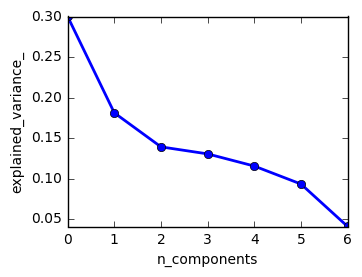

In [39]:
linear = linear_model.LinearRegression()
# use linear regression instead

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('linear', linear)])

pca.fit(x)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
#plt.plot(pca.explained_variance_, linewidth=2, marker='o')
plt.plot(pca.explained_variance_ratio_, linewidth=2, marker='o')
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
print(pca.explained_variance_ratio_)

In [40]:
np.sum(pca.explained_variance_ratio_[:5])

0.86603111175280933

### pca regression to predict

number of component: 5
score: 0.2935686464337291


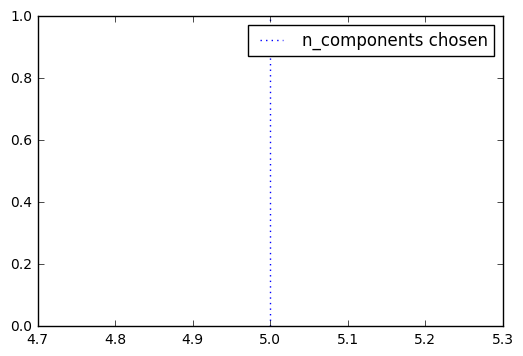

In [41]:

n_components = [1, 2, 3, 4, 5]
#Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components))
                              #logistic__C=Cs))
estimator.fit(x, y)

print('number of component: {}'.format(
        estimator.best_estimator_.named_steps['pca'].n_components))
print('score: {}'.format(estimator.score(x, y)))

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

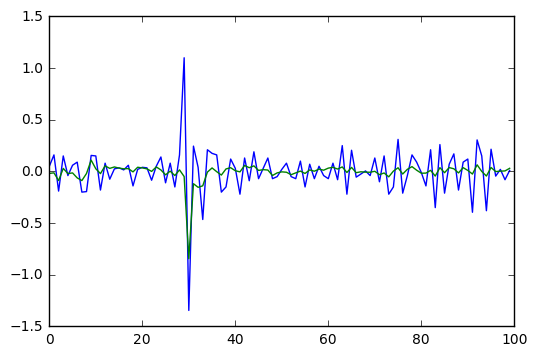

In [51]:
y_pca = estimator.predict(x_test)

fig, ax = plt.subplots()
ax.plot(y_test.values[:100])
ax.plot(y_pca[:100])

In [43]:
y_total = y_test*y_pca
len(y_total[y_total>0])/(len(y_total))

0.7043480910448215

### linear regression to predict

In [44]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

y_lin = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Mean squared error: {}'.format(np.mean((y_lin - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: {}'.format(regr.score(x_test, y_test)))

Coefficients: 
 [ -5.00832976e-02  -5.99063805e-04   1.60083917e-04   2.91464953e-04
   1.50909871e-05   6.52373943e-04   1.03741240e-03]
Mean squared error: 0.006508427573128437
Variance score: 0.41469490605139825


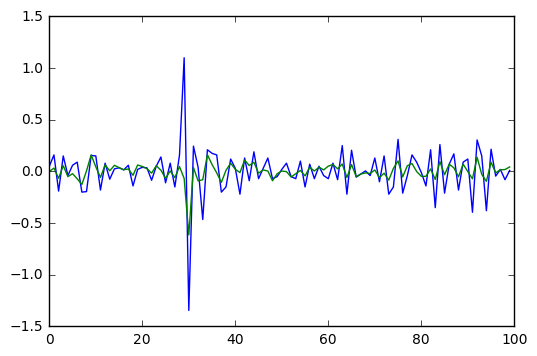

In [45]:
fig, ax = plt.subplots()
ax.plot(y_test.values[:100])
ax.plot(y_lin[:100])

In [46]:
y_total = y_test*y_lin
len(y_total[y_total>0])/(len(y_total))

0.7357932904719827

### ridge regression

In [47]:
reg = linear_model.Ridge(alpha=0.5)
reg.fit(x, y)
y_reg = reg.predict(x_test)

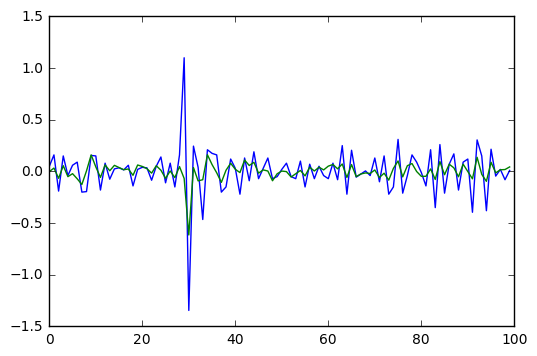

In [48]:
fig, ax = plt.subplots()
ax.plot(y_test.values[:100])
ax.plot(y_reg[:100])

In [49]:
y_total = y_test*y_reg
len(y_total[y_total>0])/(len(y_total))

0.7357932904719827